# Turning DataFrames into Pretty Pictures with Plotnine

This notebook contains several exercises.
Each exercise includes one or more hints and the answer for when you're stuck.

## Resources

These resources could be helpful while solving the exercises:

* [Plotnine documentation](https://plotnine.org)
* [Cheat Sheet (PDF)](https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf)
* [Heuristics for translating R to Python](https://jeroenjanssens.com/heuristics/)

In [21]:
import polars as pl
from plotnine import *
from datetime import timedelta

## Read data

You'll be using data related to bike trips in New York City.
Just to be on the safe side, you'll be using a subset of the original dataset (7441 rows). 
The following code snippets reads in 31 Parquet files, and only keeps the trips that end at W 41 St & 8 Ave, which is the bike station closest to the PyData NYC 2024 conference.

In [24]:
trips = (
    pl.read_parquet("data/citibike/*.parquet")
    .filter(pl.col("station_end") == "W 41 St & 8 Ave", pl.col("duration") < timedelta(hours=1))
)
trips

bike_type,rider_type,datetime_start,datetime_end,duration,station_start,station_end,neighborhood_start,neighborhood_end,borough_start,borough_end,lat_start,lon_start,lat_end,lon_end,distance
cat,cat,datetime[μs],datetime[μs],duration[μs],str,str,str,str,str,str,f64,f64,f64,f64,f64
"""classic""","""member""",2024-03-01 00:14:55.875,2024-03-01 00:22:50.009,7m 54s 134ms,"""W 50 St & 9 Ave""","""W 41 St & 8 Ave""","""Hell's Kitchen""","""Theater District""","""Manhattan""","""Manhattan""",40.763605,-73.98918,40.756405,-73.990026,0.803685
"""electric""","""member""",2024-03-01 00:19:27.960,2024-03-01 00:32:08.513,12m 40s 553ms,"""W Broadway & W Houston St""","""W 41 St & 8 Ave""","""SoHo""","""Theater District""","""Manhattan""","""Manhattan""",40.7261,-74.000394,40.756405,-73.990026,3.48122
"""electric""","""member""",2024-03-01 00:52:01.801,2024-03-01 01:00:50.647,8m 48s 846ms,"""W 46 St & 11 Ave""","""W 41 St & 8 Ave""","""Hell's Kitchen""","""Theater District""","""Manhattan""","""Manhattan""",40.763608,-73.996823,40.756405,-73.990026,0.984439
"""electric""","""member""",2024-03-01 04:58:58.050,2024-03-01 05:08:02.308,9m 4s 258ms,"""W 4 St & 7 Ave S""","""W 41 St & 8 Ave""","""West Village""","""Theater District""","""Manhattan""","""Manhattan""",40.734029,-74.00295,40.756405,-73.990026,2.715952
"""electric""","""member""",2024-03-01 05:46:05.163,2024-03-01 05:49:40.796,3m 35s 633ms,"""E 33 St & 5 Ave""","""W 41 St & 8 Ave""","""Midtown""","""Theater District""","""Manhattan""","""Manhattan""",40.74798,-73.984642,40.756405,-73.990026,1.040846
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""electric""","""member""",2024-03-31 23:01:12.386,2024-03-31 23:07:52.923,6m 40s 537ms,"""10 Ave & W 28 St""","""W 41 St & 8 Ave""","""Chelsea""","""Theater District""","""Manhattan""","""Manhattan""",40.750666,-74.001798,40.756405,-73.990026,1.179211
"""electric""","""member""",2024-03-31 23:16:57.661,2024-03-31 23:27:24.471,10m 26s 810ms,"""Broadway & W 38 St""","""W 41 St & 8 Ave""","""Midtown""","""Theater District""","""Manhattan""","""Manhattan""",40.753154,-73.986921,40.756405,-73.990026,0.446225
"""classic""","""member""",2024-03-31 23:30:14.606,2024-03-31 23:42:26.450,12m 11s 844ms,"""Grand Army Plaza & Central Par…","""W 41 St & 8 Ave""","""Midtown""","""Theater District""","""Manhattan""","""Manhattan""",40.764397,-73.973715,40.756405,-73.990026,1.636175


## Exercise 1: Mapping columns to aesthetics

Create a scatter plot with the `distance` column on the x-axis and the `duration` column on the y-axis.

**Optional bonus questions:**

* Which other columns in the `trips` dataframe can you use for a scatter plot?
* Can you change the color of the points based on the `borough_start` column?

<details>
<summary>Hints</summary> 

* Use the `ggplot()` function to start a new Plotnine visualization.
* Use the `aes()` function to map columns to aesthetics.
* Find the appropriate geometry type by typing `geom_<TAB>` or check the cheat sheet.

</details>

<details>
<summary>Answer</summary> 
<p>
    
```python
ggplot(trips, aes(x="distance", y="duration")) + geom_point()
```
</p>

</details>

## Exercise 2: Optional statistical transformation 

The following code snippet yields an error: 

In [55]:
# ggplot(trips, aes(x="distance", y="duration")) + geom_histogram()

What needs to be changed in order to produce a histogram?

<details>
<summary>Hints</summary> 

* The function `geom_histogram()` does a statistical transformation. Under the hood, it calculates the `y` aesthetic for us.

</details>

<details>
<summary>Answer</summary> 
<p>
    
```python
ggplot(trips, aes(x="distance")) + geom_histogram()
```
</p>

</details>

## Exercise 3: From data values to aesthetic values using scales

The stacked bar chart produced by the following snippet has hidious colors. Can you improve them?

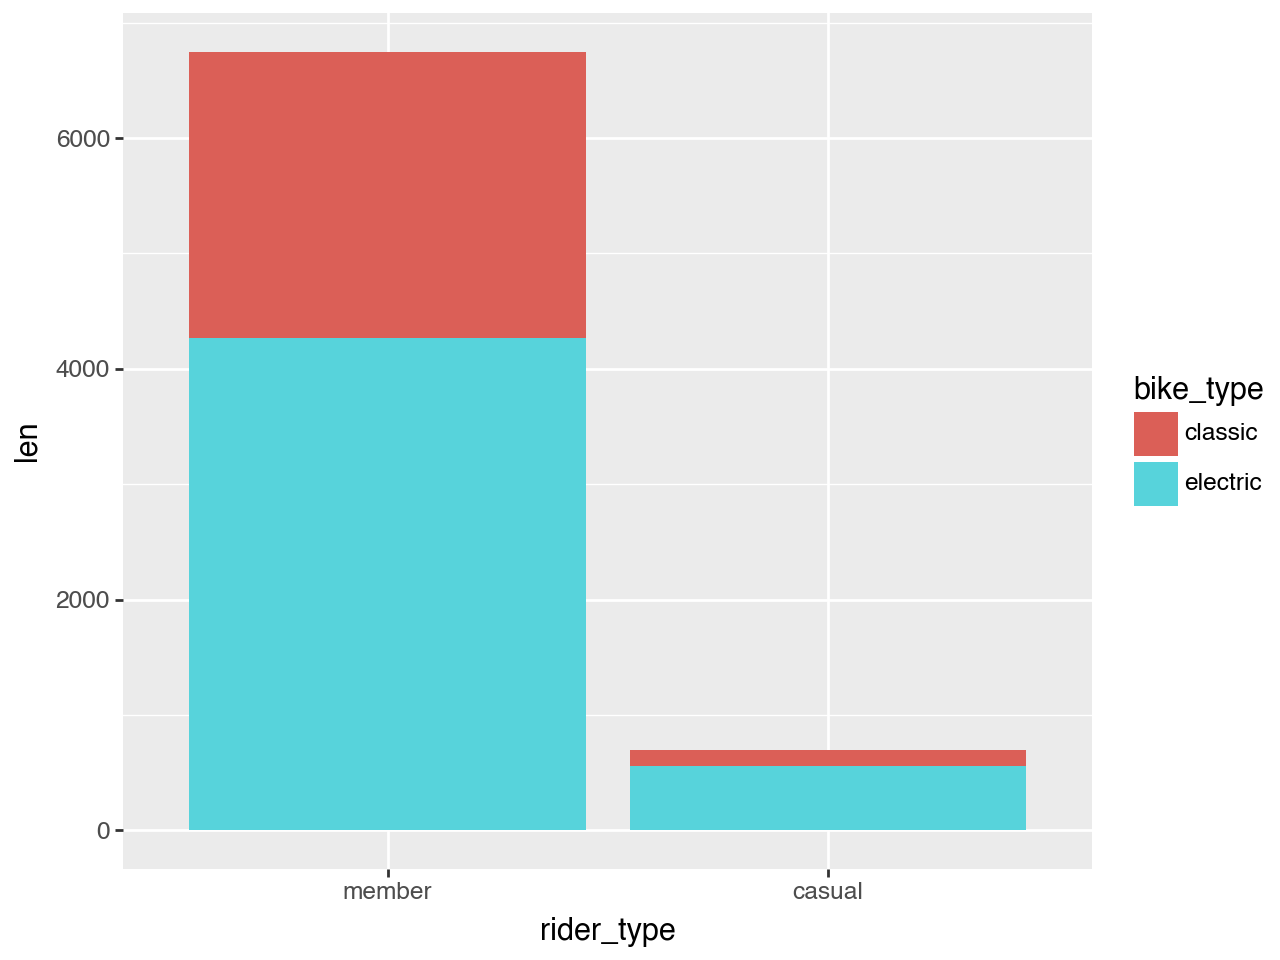

In [56]:
trips_type_counts = trips.group_by("rider_type", "bike_type").len()

ggplot(trips_type_counts, aes(x="rider_type", fill="bike_type", y="len")) + geom_col()

**Optional bonus questions:**

* Use the right function to manually specify your favorite hex colors or color names.  

<details>
<summary>Hints</summary> 

* Use a function that starts with `scale_fill_*`
* Check the cheat sheet and Plotnine documentation for available functions.

</details>

<details>
<summary>Answer</summary> 
<p>
    
```python
ggplot(trips_type_counts, aes(x="rider_type", fill="bike_type", y="len")) + geom_col() + scale_fill_brewer(type="qual")

ggplot(trips_type_counts, aes(x="rider_type", fill="bike_type", y="len")) + geom_col() + scale_fill_manual(values=("darkgreen", "pink"))
```
</p>

</details>

## Exercise 4: Layers and inheritence

The DataFrame `trips_long` contains only trips that took longer than 50 minutes.
Modify the scatter plot below so that these long trips appear as red points:

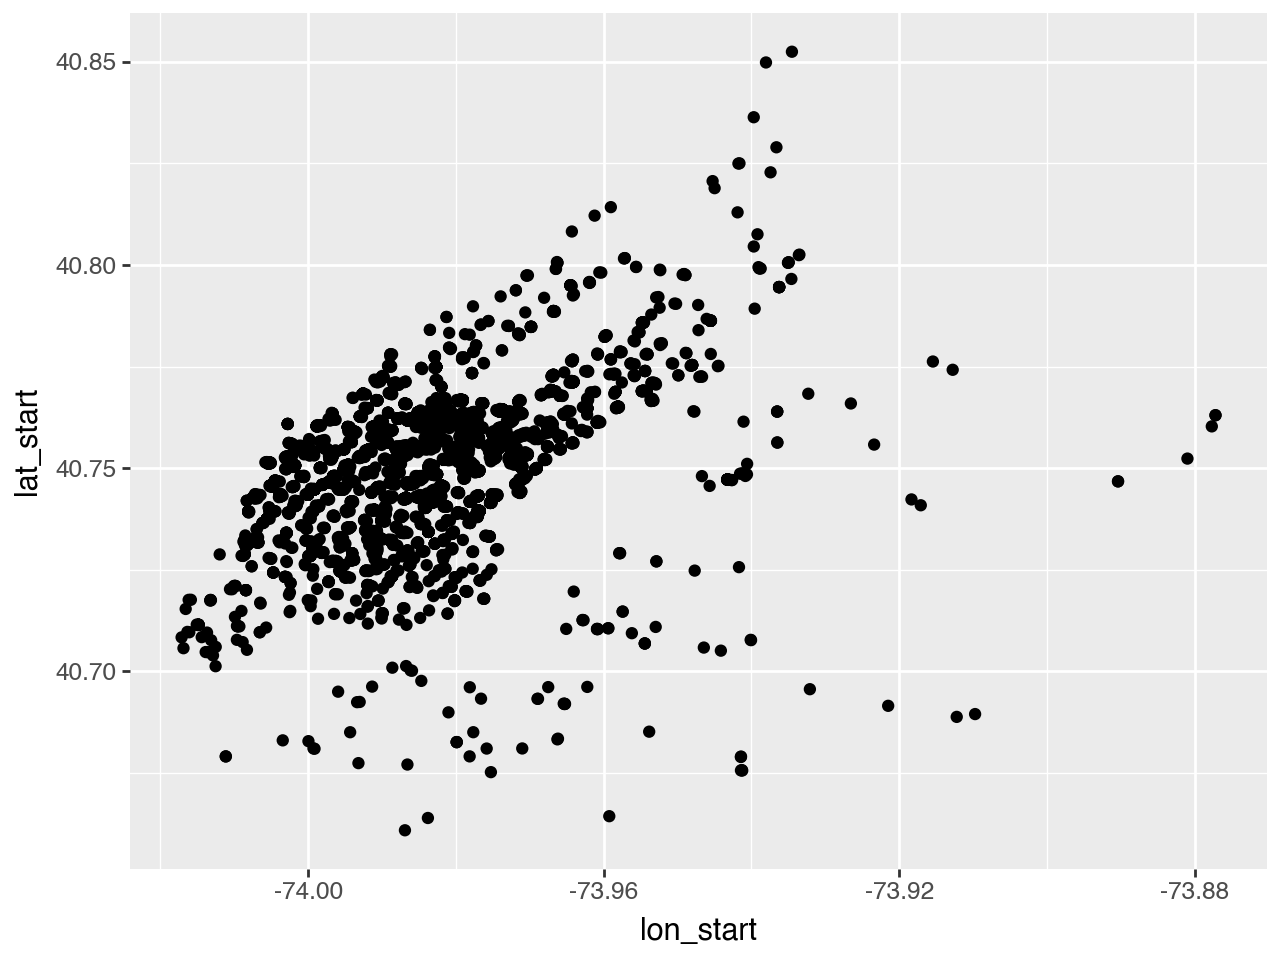

In [79]:
trips_long = trips.filter(pl.col("duration") > 50 * 60 * 1000_000) # trips that have a duration over 50 minutes
trips_long

ggplot(trips, aes(x="lon_start", y="lat_start")) + geom_point()

<details>
<summary>Hints</summary> 

* You can use the same `geom_*` function more than once
* You can override the `data` argument for each geometry

</details>

<details>
<summary>Answer</summary> 
<p>
    
```python
(
    ggplot(trips, aes(x="lon_start", y="lat_start"))
    + geom_point()
    + geom_point(data=trips_long, color="red")
)
```
</p>

</details>

## Exercise 5: Theme to your hearts content

Use one of the `theme_*()` functions and optionally the `theme()` function to change the looks of this plot:

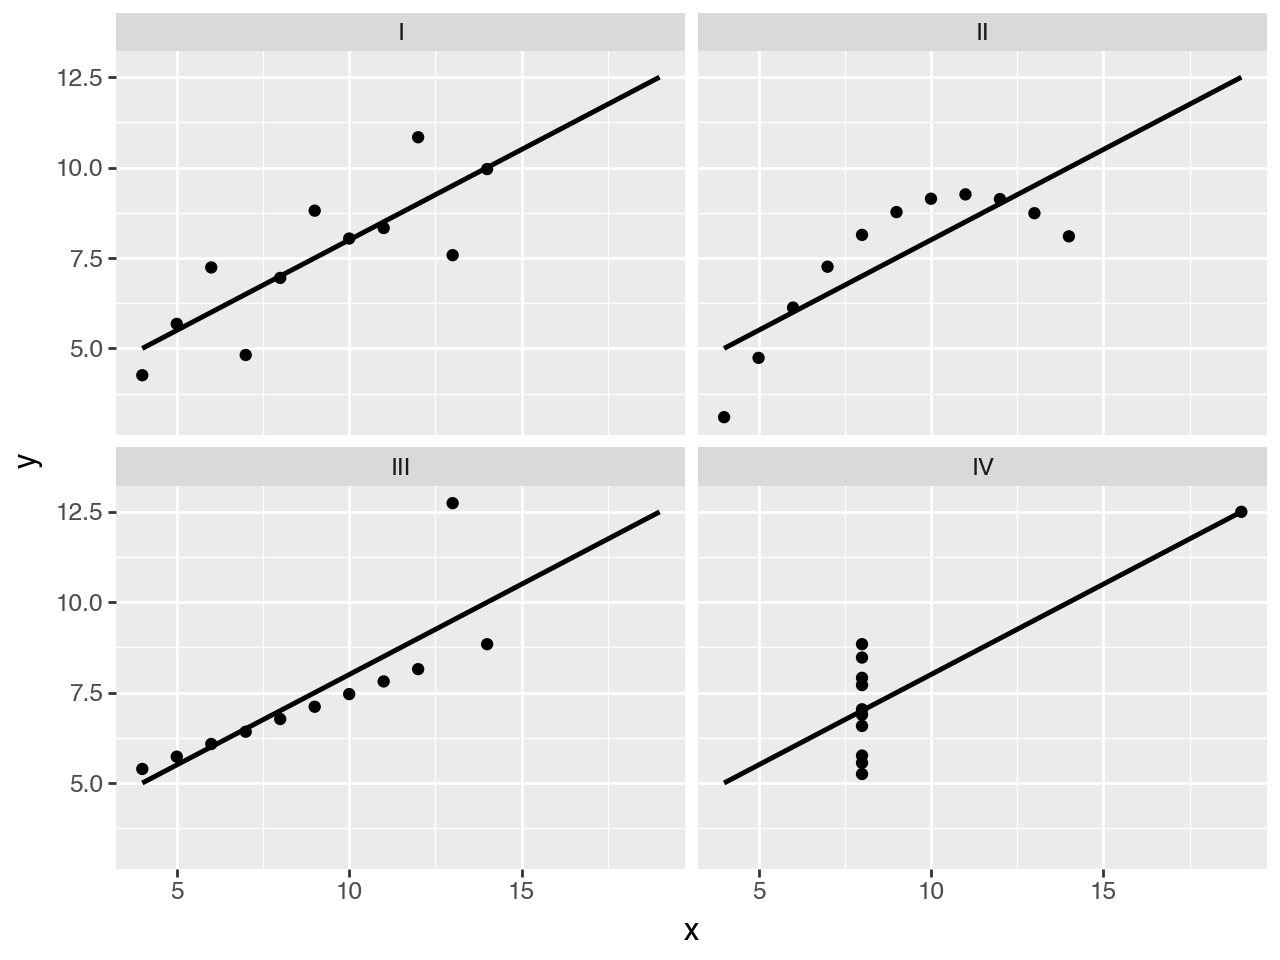

In [80]:
anscombe_quartet = pl.read_csv("data/anscombe_quartet.csv")

(
    ggplot(anscombe_quartet, aes("x", "y")) +
    geom_point() +
    geom_smooth(method="lm", se=False, fullrange=True) +
    facet_wrap("dataset")
)

**Optional bonus question:**

* Match the Anscombe's Quartet plot used in the [presentation(https://bit.ly/plotnine-tutorial) as closely as possible.

<details>
<summary>Hints</summary> 

* Use the `theme_tufte()` function.
* Look at the theme slide in the presentation to see the hierarchy of theming elements.

</details>

<details>
<summary>Answer</summary> 
<p>
    
```python
(
    ggplot(anscombe_quartet, aes("x", "y")) +
    geom_point(color="sienna", fill="darkorange", size=3) +
    geom_smooth(method="lm", se=False, fullrange=True, color="steelblue", size=1) +
    facet_wrap("dataset") +
    scale_y_continuous(breaks=(4, 8, 12)) +
    coord_fixed(xlim=(3, 22), ylim=(2, 14)) +
    labs(title="Anscombe’s Quartet") +
    theme_tufte() +
    theme(
        axis_line=element_line(color="#4d4d4d"),
        axis_ticks_major=element_line(color="#00000000"),
        axis_title=element_blank(),
        plot_background=element_rect(fill="#ffffff", color="#ffffff"),
        dpi=144,
        panel_spacing=0.09,
        strip_text=element_text(size=12),
        title=element_text(size=16, margin={"b": 20})
    )
)
```
</p>

</details>